In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Download data from Yahoo Finance
indices_ticker = ["^GSPC", "^DJI", "^IXIC", "^RUT", "^VIX"]
equity_ticker = ["AAPL", "MSFT", "AMZN", "NVDA", "NFLX"]
indices_data = yf.download(indices_ticker, start="2010-01-01", end="2020-12-31")['Adj Close']
equity_data = yf.download(equity_ticker, start="2010-01-01", end="2020-12-31")['Adj Close']


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


In [4]:
indices_data.head()

,^DJI,^GSPC,^IXIC,^RUT,^VIX
Date,,,,,
2010-01-04,10583.959961,1132.989990,2308.419922,640.099976,20.040001
2010-01-05,10572.019531,1136.520020,2308.709961,638.489990,19.350000
2010-01-06,10573.679688,1137.140015,2301.090088,637.950012,19.160000
2010-01-07,10606.860352,1141.689941,2300.050049,641.969971,19.059999
2010-01-08,10618.190430,1144.979980,2317.169922,644.559998,18.129999


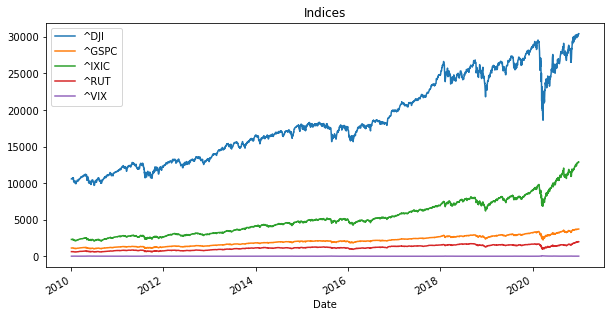

In [5]:
#visualize the data
indices_data.plot(figsize=(10, 5))
plt.title("Indices")
plt.show()


In [6]:
indices_daily_returns = indices_data.pct_change().dropna()
equity_daily_returns = equity_data.pct_change().dropna()

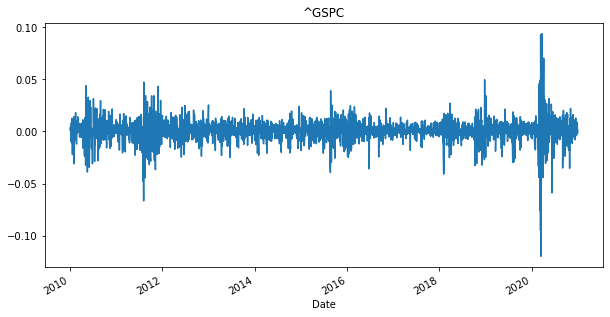

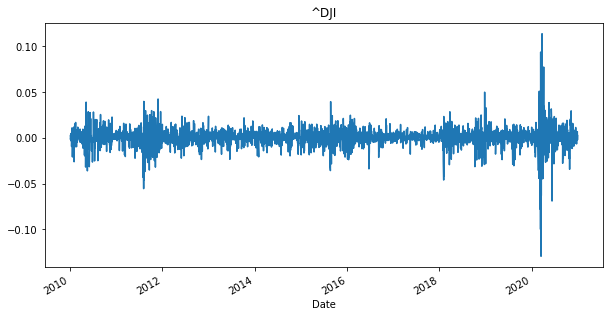

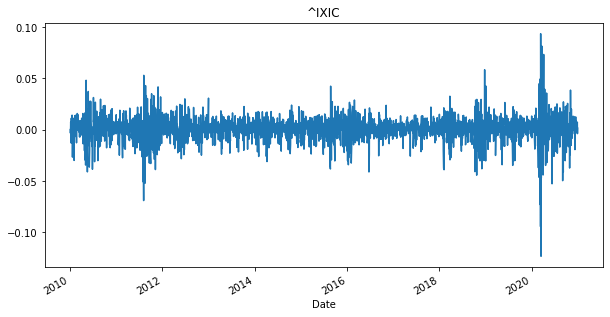

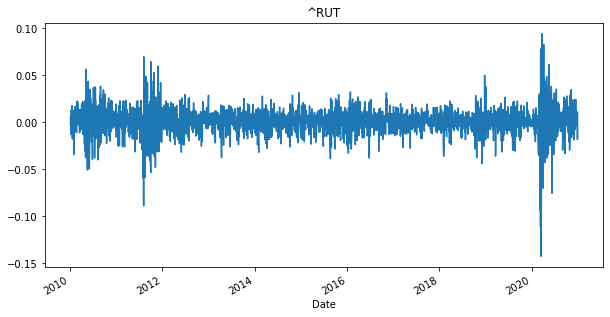

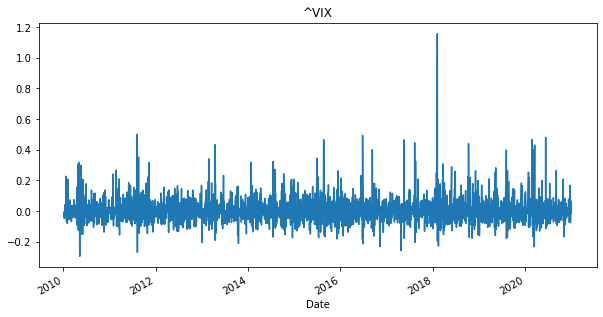

In [7]:
for index in indices_ticker:
    indices_daily_returns[index].plot(figsize=(10, 5))
    plt.title(index)
    plt.show()

In [8]:
indices_daily_returns.head()

,^DJI,^GSPC,^IXIC,^RUT,^VIX
Date,,,,,
2010-01-05,-0.001128,0.003116,0.000126,-0.002515,-0.034431
2010-01-06,0.000157,0.000546,-0.003300,-0.000846,-0.009819
2010-01-07,0.003138,0.004001,-0.000452,0.006301,-0.005219
2010-01-08,0.001068,0.002882,0.007443,0.004034,-0.048793
2010-01-11,0.004313,0.001747,-0.002054,-0.000884,-0.031991


In [9]:
indices_cumulative_returns = (indices_daily_returns + 1).cumprod()-1
equity_cumulative_returns = (equity_daily_returns + 1).cumprod()-1

In [10]:
indices_cumulative_returns.head()

,^DJI,^GSPC,^IXIC,^RUT,^VIX
Date,,,,,
2010-01-05,-0.001128,0.003116,0.000126,-0.002515,-0.034431
2010-01-06,-0.000971,0.003663,-0.003175,-0.003359,-0.043912
2010-01-07,0.002164,0.007679,-0.003626,0.002921,-0.048902
2010-01-08,0.003234,0.010583,0.003790,0.006968,-0.095309
2010-01-11,0.007561,0.012348,0.001728,0.006077,-0.124252


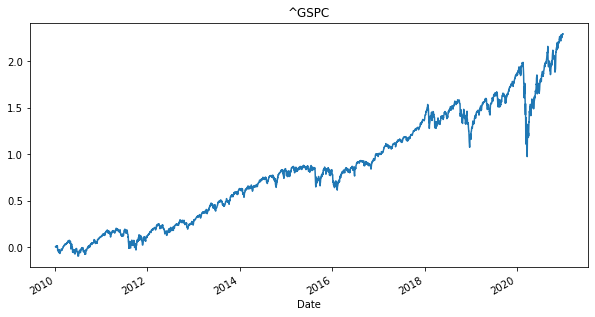

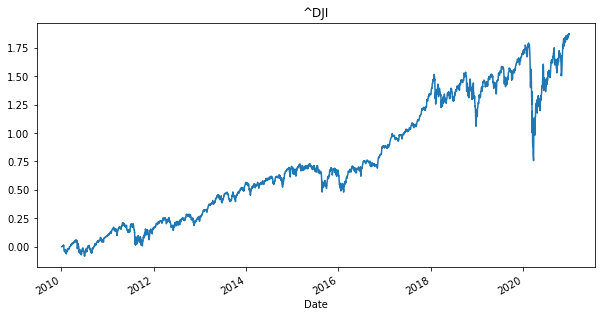

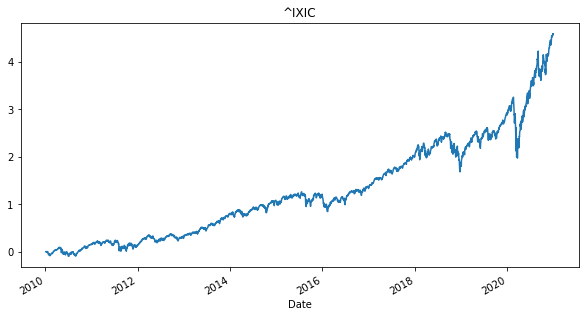

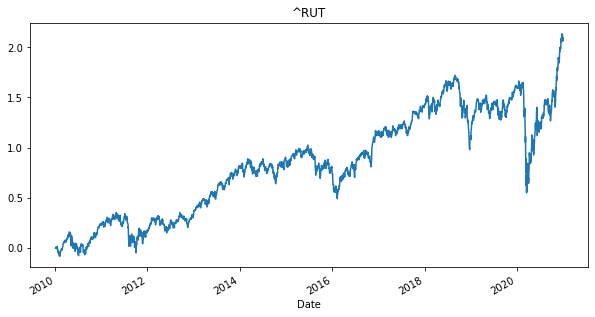

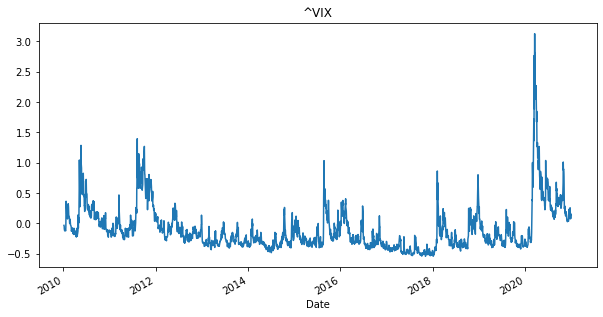

In [11]:
for index in indices_ticker:
    indices_cumulative_returns[index].plot(figsize=(10, 5))
    plt.title(index)
    plt.show()

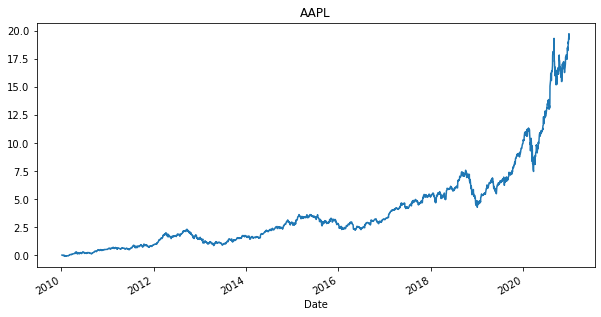

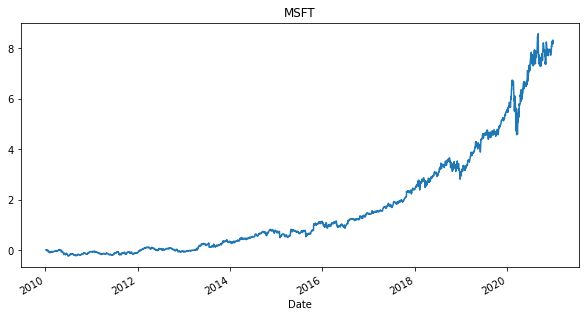

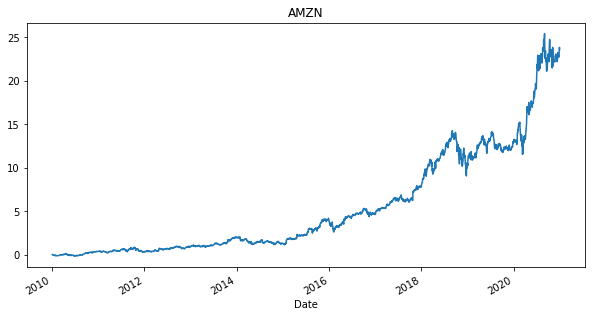

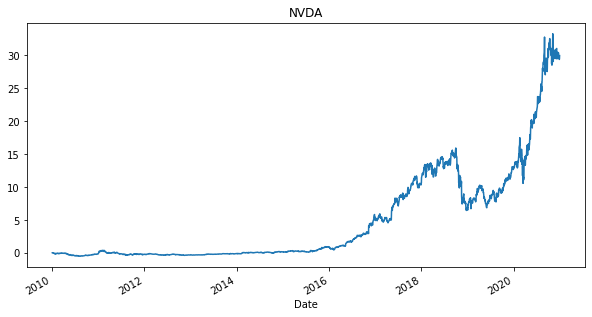

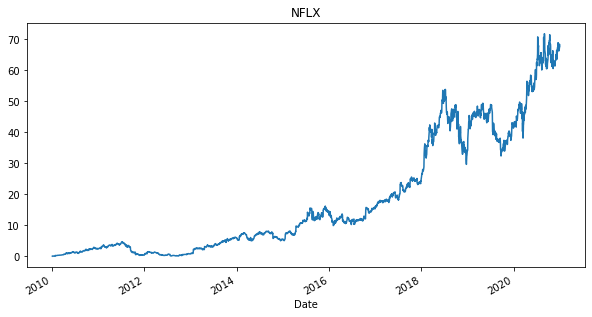

In [12]:
for equity in equity_ticker:
    equity_cumulative_returns[equity].plot(figsize=(10, 5))
    plt.title(equity)
    plt.show()

In [13]:
def max_drawdown(returns):
    cum_returns = (returns + 1).cumprod()
    peak = cum_returns.cummax()
    drawdown = (cum_returns - peak) / peak
    return drawdown.min()

def sharp_ratio(returns,risk_free_rate):
    avg_return = returns.mean()
    std_return = returns.std()
    return (avg_return-risk_free_rate)/std_return

def sortino_ratio(returns,risk_free_rate):
    avg_return = returns.mean()
    std_neg_return = returns[returns<0].std()
    return (avg_return-risk_free_rate)/std_neg_return

def volatility(returns):
    return returns.std()*(np.sqrt(252))

Risk Free Rate = 0%

In [16]:
indices_metrics = pd.DataFrame(columns=["Max Drawdown", "Sharpe Ratio", "Sortino Ratio", "Volatility","Cumulative Return"])
for index in indices_ticker:
    indices_metrics.loc[index] = [max_drawdown(indices_daily_returns[index]), sharp_ratio(indices_daily_returns[index],0), sortino_ratio(indices_daily_returns[index],0), volatility(indices_daily_returns[index]), indices_cumulative_returns[index][-1]]
indices_metrics

,Max Drawdown,Sharpe Ratio,Sortino Ratio,Volatility,Cumulative Return
^GSPC,-0.339250,0.044631,0.052768,0.174974,2.293974
^DJI,-0.370862,0.040317,0.047413,0.173975,1.873174
^IXIC,-0.301157,0.056802,0.069189,0.194731,4.575242
^RUT,-0.430613,0.035802,0.044795,0.226403,2.093251
^VIX,-0.809583,0.038739,0.080112,1.323482,0.136228


In [17]:
equity_metrics = pd.DataFrame(columns=["Max Drawdown", "Sharpe Ratio", "Sortino Ratio", "Volatility","Cumulative Return"])
for equity in equity_ticker:
    equity_metrics.loc[equity] = [max_drawdown(equity_daily_returns[equity]), sharp_ratio(equity_daily_returns[equity],0), sortino_ratio(equity_daily_returns[equity],0), volatility(equity_daily_returns[equity]), equity_cumulative_returns[equity][-1]]
equity_metrics

,Max Drawdown,Sharpe Ratio,Sortino Ratio,Volatility,Cumulative Return
AAPL,-0.437972,0.069953,0.095531,0.283088,19.280814
MSFT,-0.280393,0.058146,0.079575,0.253933,8.196295
AMZN,-0.341038,0.067824,0.097672,0.317432,23.539581
NVDA,-0.560384,0.059688,0.085880,0.424344,29.931274
NFLX,-0.819904,0.063197,0.091134,0.515660,67.663617
